<a href="https://colab.research.google.com/github/AnanyaUp/Data-Science/blob/main/K_Means_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [2]:
iris = datasets.load_iris()
X = iris.data[:, :2]  # features for visualization
y = iris.target

In [3]:
k = 3

centroids = X[np.random.choice(X.shape[0], k, replace=False)]

In [4]:
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1-x2)**2))

In [5]:
max_iterations = 100
for _ in range(max_iterations):
  labels = []
  for point in X:
    distances = [euclidean_distance(point, centroid) for centroid in centroids]
    labels.append(np.argmin(distances))
  labels = np.array(labels)

In [6]:
new_centroids = np.zeros_like(centroids)
for i in range(k):
    new_centroids[i] = np.mean(X[labels == i], axis=0)

In [7]:
if np.all(centroids == new_centroids):
  centroids = new_centroids

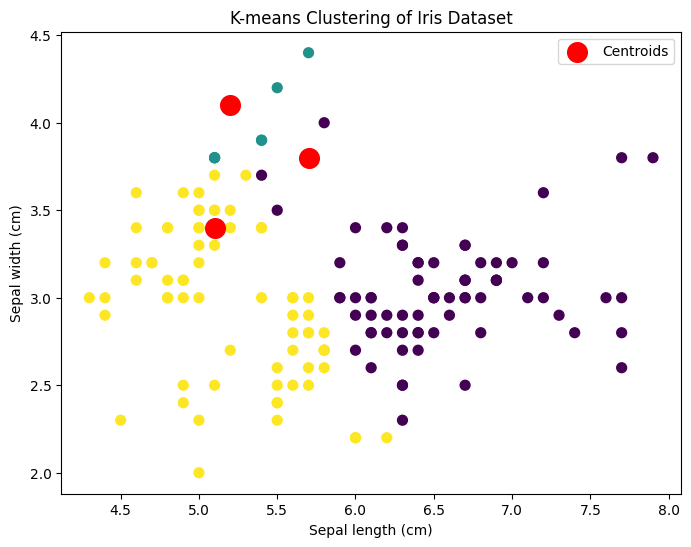

In [8]:
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50)  # Plot points with assigned cluster labels
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='o', s=200, label='Centroids')
plt.xlabel('Sepal length (cm)')
plt.ylabel('Sepal width (cm)')
plt.title('K-means Clustering of Iris Dataset')
plt.legend()
plt.show()